##I'm working with a dataset of quotes, and in our previous discussions, we've explored both image and text data. Initially, I had planned to work with audio data, but due to time constraints, I've opted to revisit text data once more. Although the dataset isn't large, it's versatile enough to allow for a comprehensive exploratory data analysis, covering aspects ranging from sentiment analysis to various other analyses. 😊

In [94]:
# pip install datasets

In [95]:
from datasets import load_dataset
data = load_dataset("abirate/english_quotes")

In [96]:
data

DatasetDict({
    train: Dataset({
        features: ['quote', 'author', 'tags'],
        num_rows: 2508
    })
})

In [97]:
print("Number of quotes:", len(data["train"]))
print("Sample quote:")
print(data["train"][0])

Number of quotes: 2508
Sample quote:
{'quote': '“Be yourself; everyone else is already taken.”', 'author': 'Oscar Wilde', 'tags': ['be-yourself', 'gilbert-perreira', 'honesty', 'inspirational', 'misattributed-oscar-wilde', 'quote-investigator']}


In [98]:
import pandas as pd
df = pd.DataFrame(data)

In [99]:
df

,train
0,{'quote': '“Be yourself; everyone else is alre...
1,"{'quote': '“I'm selfish, impatient and a littl..."
2,{'quote': '“Two things are infinite: the unive...
3,"{'quote': '“So many books, so little time.”', ..."
4,{'quote': '“A room without books is like a bod...
...,...
2503,{'quote': '“Morality is simply the attitude we...
2504,{'quote': '“Don't aim at success. The more you...
2505,"{'quote': '“In life, finding a voice is speaki..."
2506,"{'quote': '“Winter is the time for comfort, fo..."


#So Here we can see that data seems fetched in the json format , so we need to convert it into seperate columns

In [100]:
import pandas as pd
df[['quote', 'author', 'tags']] = df['train'].apply(lambda x: pd.Series([x['quote'], x['author'], x['tags']]))
df.drop(columns=['train'], inplace=True)

In [101]:
df

,quote,author,tags
0,“Be yourself; everyone else is already taken.”,Oscar Wilde,"[be-yourself, gilbert-perreira, honesty, inspi..."
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[best, life, love, mistakes, out-of-control, t..."
2,“Two things are infinite: the universe and hum...,Albert Einstein,"[human-nature, humor, infinity, philosophy, sc..."
3,"“So many books, so little time.”",Frank Zappa,"[books, humor]"
4,“A room without books is like a body without a...,Marcus Tullius Cicero,"[books, simile, soul]"
...,...,...,...
2503,“Morality is simply the attitude we adopt towa...,"Oscar Wilde,","[morality, philosophy]"
2504,“Don't aim at success. The more you aim at it ...,"Viktor E. Frankl,","[happiness, success]"
2505,"“In life, finding a voice is speaking and livi...",John Grisham,[inspirational-life]
2506,"“Winter is the time for comfort, for good food...",Edith Sitwell,"[comfort, home, winter]"


# Now for the EDA first we need to clean up the data


In [102]:
# Check for missing values
print(df.isnull().sum())

quote     0
author    0
tags      0
dtype: int64


#Thank god we dont have any missing values

In [103]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [104]:
df['tags'] = df['tags'].apply(lambda x: ', '.join(x))

In [105]:
df

,quote,author,tags
0,“Be yourself; everyone else is already taken.”,Oscar Wilde,"be-yourself, gilbert-perreira, honesty, inspir..."
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"best, life, love, mistakes, out-of-control, tr..."
2,“Two things are infinite: the universe and hum...,Albert Einstein,"human-nature, humor, infinity, philosophy, sci..."
3,"“So many books, so little time.”",Frank Zappa,"books, humor"
4,“A room without books is like a body without a...,Marcus Tullius Cicero,"books, simile, soul"
...,...,...,...
2503,“Morality is simply the attitude we adopt towa...,"Oscar Wilde,","morality, philosophy"
2504,“Don't aim at success. The more you aim at it ...,"Viktor E. Frankl,","happiness, success"
2505,"“In life, finding a voice is speaking and livi...",John Grisham,inspirational-life
2506,"“Winter is the time for comfort, for good food...",Edith Sitwell,"comfort, home, winter"


In [106]:
df['quote'] = df['quote'].str.lower()
df['author'] = df['author'].str.lower()
df['author'] = df['author'].str.rstrip(',')
df['tags'] = df['tags'].str.lower()

In [107]:
# df

In [108]:
df['quote'] = df['quote'].str.replace('[^a-zA-Z0-9\s]', '')

<ipython-input-108-de41bab9884f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['quote'] = df['quote'].str.replace('[^a-zA-Z0-9\s]', '')


In [109]:
# df

In [110]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

#stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]  # Lemmatization
    tokens = [token for token in tokens if token not in string.punctuation]  # Remove punctuation
    return ' '.join(tokens)

# Applying quote to function
df['quote'] = df['quote'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Now data seems cleaned

##Now we'll take a closer look at these quotes, we'll use a word cloud to see which words are used most often

#So here you can see that LOVE is most used word,can't be a doubt, right?


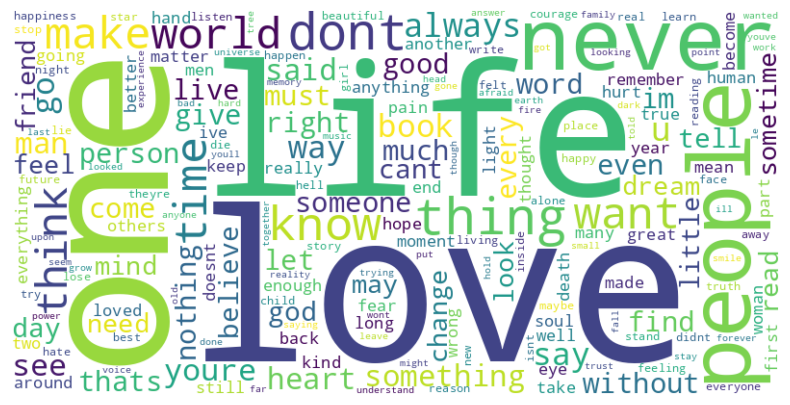

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_quotes = ' '.join(df['quote'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_quotes)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Now let's dive into these quotes a bit more. First, we'll use a tool called POS tagging to figure out what parts of speech each word belongs to. It's like labeling each word with a tag that tells us its role in the sentence.

##Now, see the most common tags you'll see 'NN' and 'JJ' appearing the most. These tags represent nouns and adjective, which are the building blocks of sentences. On the other hand, the least common tags like 'UH$' and 'PRS$' are less frequent, indicating words like possessive pronouns and proper nouns. It's interesting to see how different types of words show up in the quotes!"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


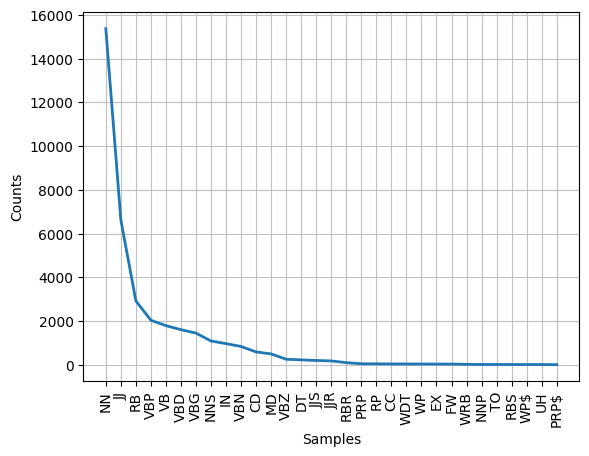

<Axes: xlabel='Samples', ylabel='Counts'>

In [112]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenize words
df['word_tokens'] = df['quote'].apply(word_tokenize)
#  POS tagging
df['pos_tags'] = df['word_tokens'].apply(pos_tag)
pos_tags_flat = [tag for sublist in df['pos_tags'] for tag in sublist]
pos_freq = nltk.FreqDist(tag for (word, tag) in pos_tags_flat)
pos_freq.plot()


##Now, let's check something called Named Entity Recognition (NER). It helps us find important things in the quotes, like people's names, dates, or company names. After checking all the quotes, we'll see which things are mentioned most often.we are also noticing that names of people and dates are very common,while percentages and product names are less common

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


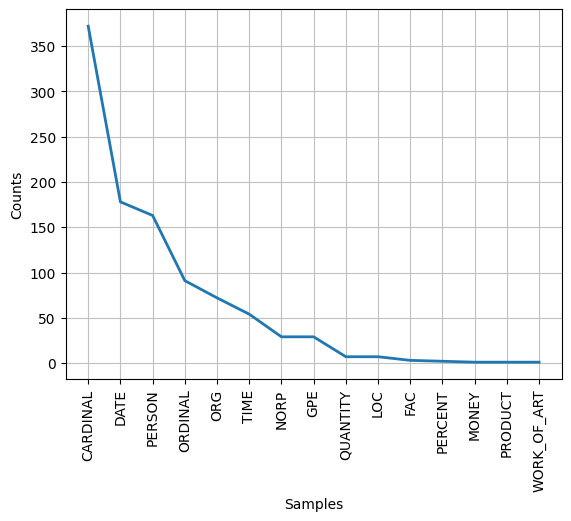

<Axes: xlabel='Samples', ylabel='Counts'>

In [113]:
import spacy
nlp = spacy.load('en_core_web_sm')
df['entities'] = df['quote'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])
entities_flat = [ent for sublist in df['entities'] for ent in sublist]
entity_types = [ent[1] for ent in entities_flat]
entity_freq = nltk.FreqDist(entity_types)
entity_freq.plot()


##Now, let's analyze the quotes. First, we'll count how many words are in each quote and how many of those words are unique. Then, we'll calculate the average length of words in each quote.I have also created histograms for better visulization.

Text analysis:
        word_count  unique_word_count  avg_word_length
count  2508.000000        2508.000000      2508.000000
mean     14.737640          12.803828         5.493577
std      22.929988          17.103797         0.929320
min       0.000000           0.000000         0.000000
25%       6.000000           6.000000         4.909091
50%       9.000000           8.000000         5.439338
75%      15.000000          13.000000         6.000000
max     347.000000         226.000000         9.333333


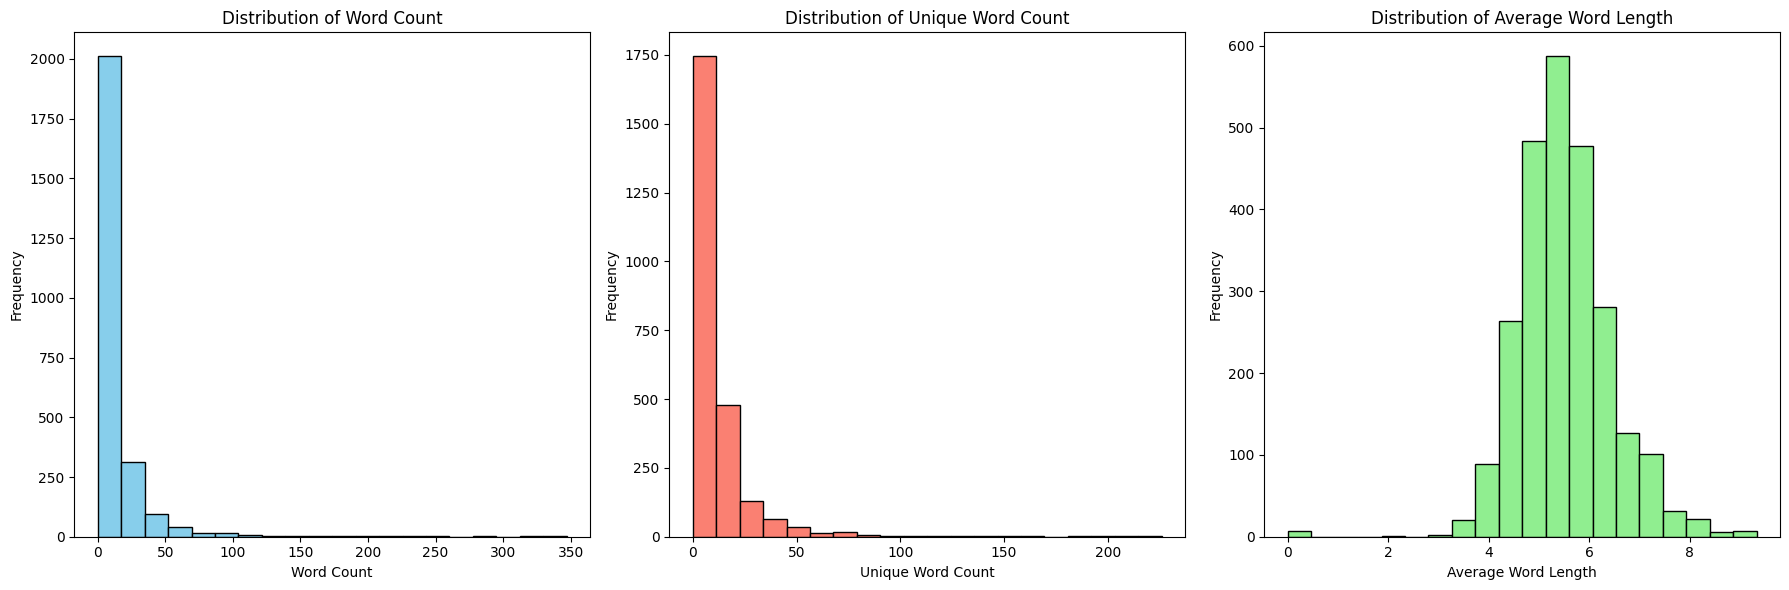

In [114]:
import matplotlib.pyplot as plt

# Word count
df['word_count'] = df['quote'].apply(lambda x: len(x.split()))

# Unique word count
df['unique_word_count'] = df['quote'].apply(lambda x: len(set(x.split())))

# Average word length
df['avg_word_length'] = df.apply(lambda row: sum(len(word) for word in row['quote'].split()) / row['word_count'] if row['word_count'] > 0 else 0, axis=1)

print("Text analysis:")
print(df[['word_count', 'unique_word_count', 'avg_word_length']].describe())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Word count histogram
axes[0].hist(df['word_count'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Word Count')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

# Unique word count histogram
axes[1].hist(df['unique_word_count'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Unique Word Count')
axes[1].set_xlabel('Unique Word Count')
axes[1].set_ylabel('Frequency')

# Average word length histogram
axes[2].hist(df['avg_word_length'], bins=20, color='lightgreen', edgecolor='black')
axes[2].set_title('Distribution of Average Word Length')
axes[2].set_xlabel('Average Word Length')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


##We're checking the sentiment of the quotes. The histogram shows if they're mostly positive or negative. Take a peek to see the overall sentiment


In [115]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

df['vader_sentiment'] = df['quote'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Display sentiment statistics
print("VADER Sentiment Analysis:")
print(df['vader_sentiment'].describe())

VADER Sentiment Analysis:
count    2508.000000
mean        0.176599
std         0.528059
min        -0.992200
25%        -0.202300
50%         0.202300
75%         0.636900
max         0.999500
Name: vader_sentiment, dtype: float64


##Definately these are quotes some are written by heartbrokeans and some are written by Stoics so major average ground of sentiment stays near 0.0

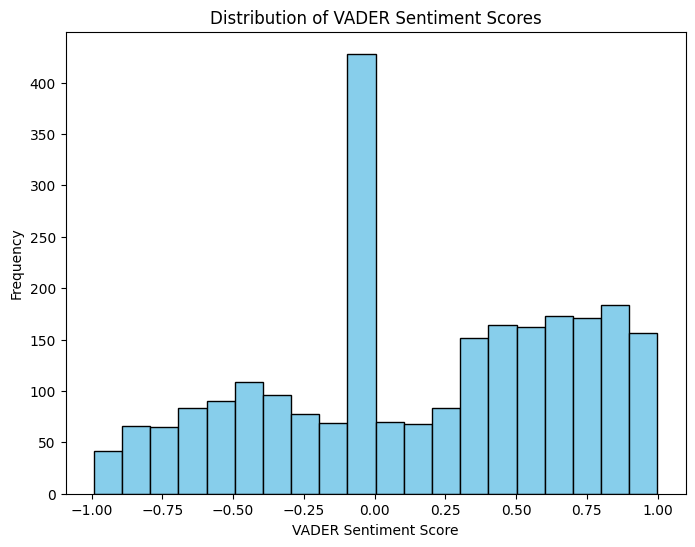

In [116]:
import matplotlib.pyplot as plt

# Plot histogram for VADER sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['vader_sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of VADER Sentiment Scores')
plt.show()

In [117]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # TF-IDF vectorization
# vectorizer = TfidfVectorizer(max_features=1000)
# tfidf_matrix = vectorizer.fit_transform(df['clean_quote'])

# feature_names = vectorizer.get_feature_names_out()

# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
# print("TF-IDF Matrix:")
# print(tfidf_df.head())

##We turn each word into a special number pattern that captures its meaning. With Word2Vec, we learn these patterns from quotes. Then, we shrink the patterns down to 2D and plot them on a TSNE Plot. This helps us see which words are similar or often used together.

In [118]:
from gensim.models import Word2Vec

# Tokenize quotes for Word2Vec model
tokenized_quotes = [word_tokenize(quote.lower()) for quote in df['quote']]

# Train Word2Vec model
w2v_model = Word2Vec(tokenized_quotes, vector_size=100, window=5, min_count=1, sg=1)

# word embeddings
word_embeddings = {word: w2v_model.wv[word] for word in w2v_model.wv.index_to_key}


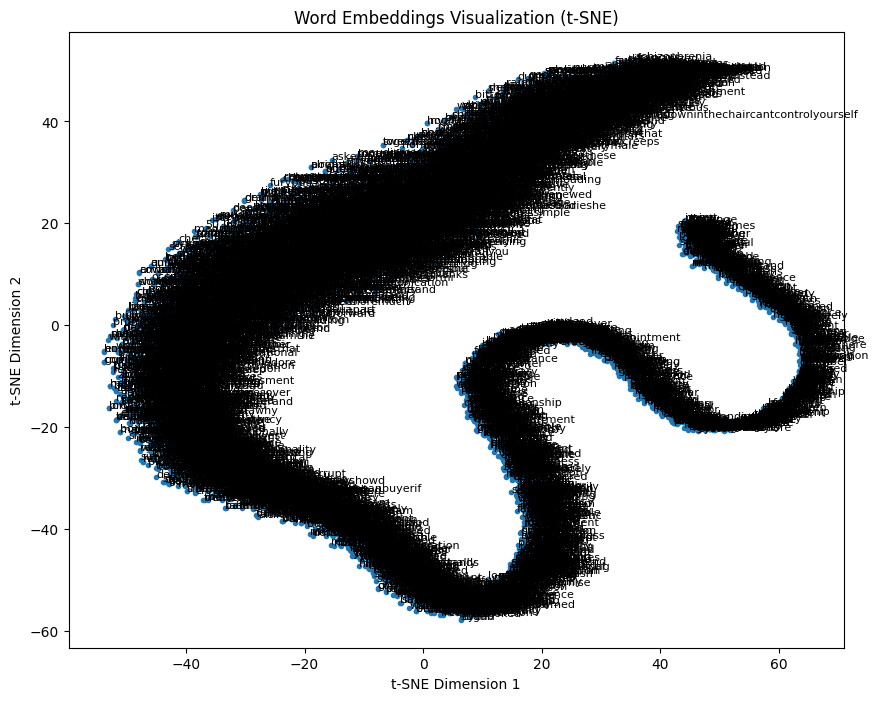

In [119]:
from sklearn.manifold import TSNE
import numpy as np

words = list(word_embeddings.keys())
vectors = np.array([word_embeddings[word] for word in words])

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(vectors)

# Plot word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker='.')
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=8)
plt.title('Word Embeddings Visualization (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


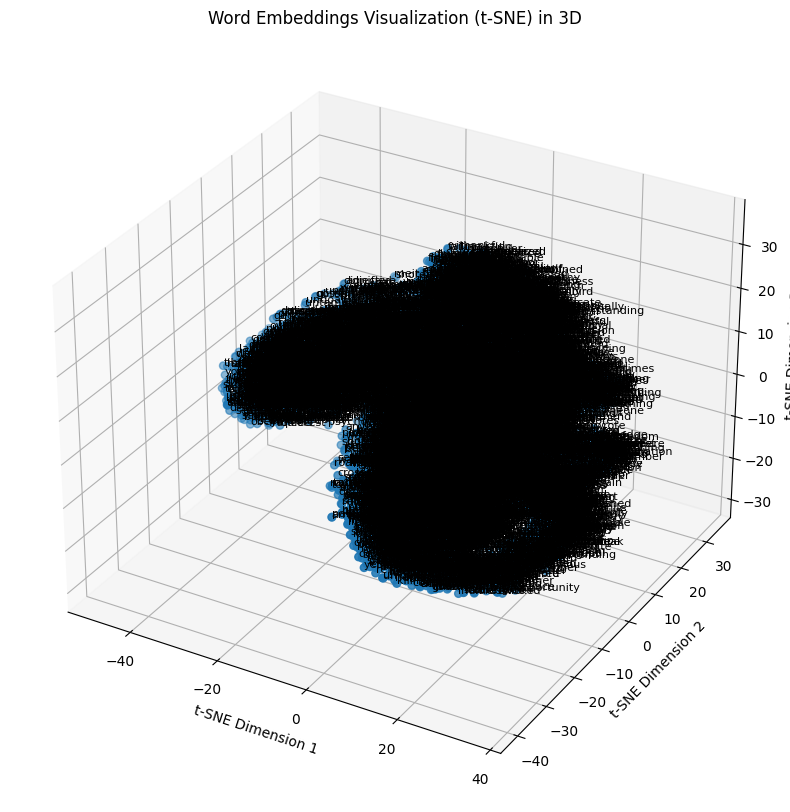

In [120]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting

# Extract word vectors
words = list(word_embeddings.keys())
vectors = np.array([word_embeddings[word] for word in words])

# Apply t-SNE for dimensionality reduction with 3D output
tsne = TSNE(n_components=3, random_state=42)
word_vectors_tsne_3d = tsne.fit_transform(vectors)

# Plot word embeddings in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(word_vectors_tsne_3d[:, 0], word_vectors_tsne_3d[:, 1], word_vectors_tsne_3d[:, 2], marker='o', s=30)

# Annotate each point with its word
for i, word in enumerate(words):
    ax.text(word_vectors_tsne_3d[i, 0], word_vectors_tsne_3d[i, 1], word_vectors_tsne_3d[i, 2], word, fontsize=8)

ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('Word Embeddings Visualization (t-SNE) in 3D')
plt.show()


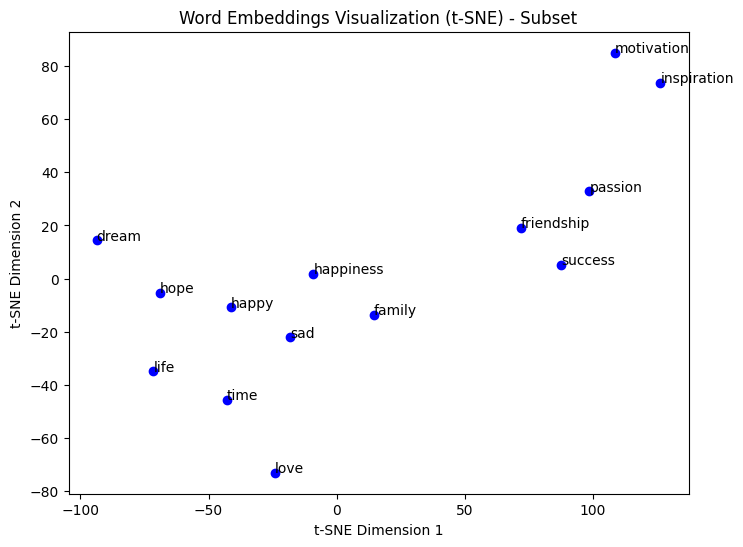

In [121]:
# Select a subset of words for visualization
subset_words = ['love', 'life', 'time', 'happy', 'sad', 'hope', 'dream', 'family', 'friendship', 'success', 'inspiration', 'motivation', 'happiness', 'passion']

# Find corresponding vectors for subset words
subset_vectors = np.array([word_embeddings[word] for word in subset_words])

# Apply t-SNE for dimensionality reduction with reduced perplexity
tsne_subset = TSNE(n_components=2, perplexity=5, random_state=42)
subset_vectors_tsne = tsne_subset.fit_transform(subset_vectors)

# Plot word embeddings for subset
plt.figure(figsize=(8, 6))
plt.scatter(subset_vectors_tsne[:, 0], subset_vectors_tsne[:, 1], marker='o', color='blue')
for i, word in enumerate(subset_words):
    plt.annotate(word, xy=(subset_vectors_tsne[i, 0], subset_vectors_tsne[i, 1]), fontsize=10)
plt.title('Word Embeddings Visualization (t-SNE) - Subset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

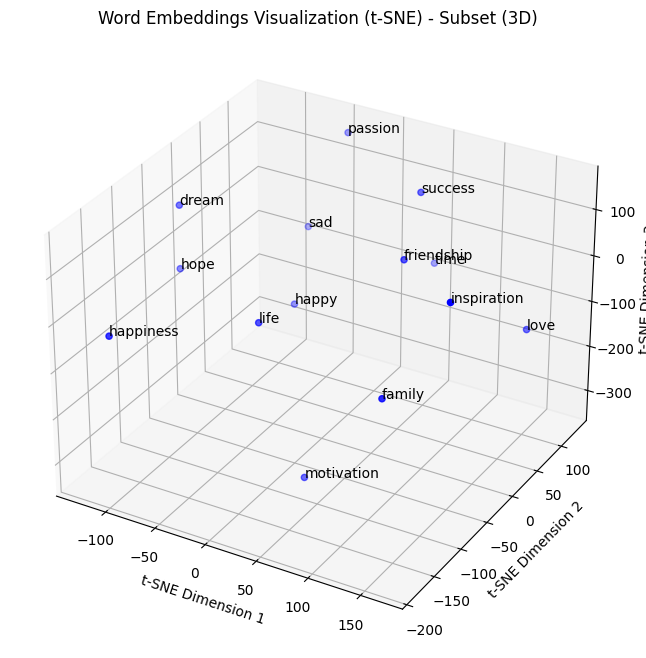

In [122]:
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE for dimensionality reduction with 3D output
tsne_3d = TSNE(n_components=3, perplexity=5, random_state=42)
subset_vectors_tsne_3d = tsne_3d.fit_transform(subset_vectors)

# Plot word embeddings for subset in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(subset_vectors_tsne_3d[:, 0], subset_vectors_tsne_3d[:, 1], subset_vectors_tsne_3d[:, 2], marker='o', color='blue')
for i, word in enumerate(subset_words):
    ax.text(subset_vectors_tsne_3d[i, 0], subset_vectors_tsne_3d[i, 1], subset_vectors_tsne_3d[i, 2], word, fontsize=10)
ax.set_title('Word Embeddings Visualization (t-SNE) - Subset (3D)')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()


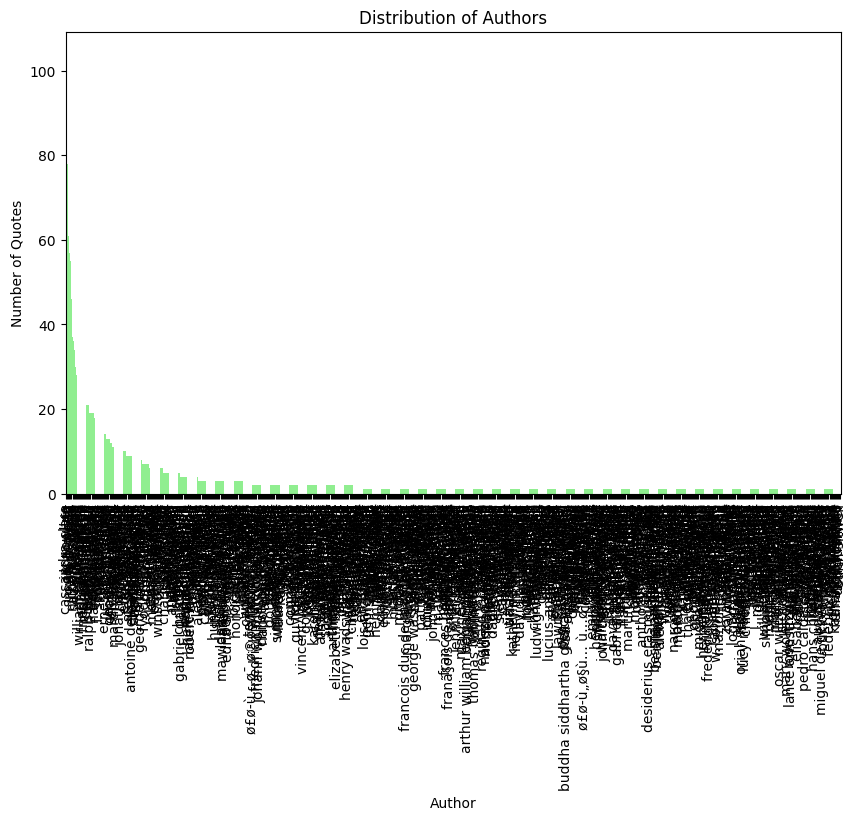

In [123]:
import matplotlib.pyplot as plt
# Distribution of authors
author_counts = df['author'].value_counts()

plt.figure(figsize=(10, 6))
author_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Authors')
plt.xlabel('Author')
plt.ylabel('Number of Quotes')
plt.show()